In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
tf.__version__

'2.3.0'

In [3]:
observation = 1000

In [15]:
xs = np.random.uniform(-10, 10, size=(observation, 1))
zs = np.random.uniform(-10, 10, size = (observation,1))

In [24]:
generated_inputs = np.column_stack((xs,zs))

In [25]:
print(generated_inputs.shape)

(1000, 2)


In [26]:
noise = np.random.uniform(-1, 1, (observation,1))

In [27]:
generated_targets = 13*xs + 7*zs - 12 + noise

In [28]:
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [30]:
#saving data in npz format
training_data = np.load('TF_intro.npz')
training_data

In [37]:
input_size=2
output_size =1
#sequential for stacking layers
model = tf.keras.Sequential([tf.keras.layers.Dense(output_size)])


model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs =100, verbose =1)


Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 319.2493
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 22.7755
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4856
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.9982
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8256
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4755
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3747
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3497
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3509
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3471
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3371
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3473
Epoch 13/100
32/32 [==============

In [38]:
## extracting weights and biases

In [39]:
weights = model.layers[0].get_weights()[0]
weights

array([[13.036175],
       [ 7.04708 ]], dtype=float32)

In [40]:
biases = model.layers[0].get_weights()[1]
biases

array([-11.990037], dtype=float32)

In [41]:
##predicting values 

In [43]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 9.310e+01],
       [ 6.450e+01],
       [-9.680e+01],
       [-1.480e+02],
       [ 1.144e+02],
       [-5.950e+01],
       [-3.130e+01],
       [-7.180e+01],
       [-5.920e+01],
       [-8.830e+01],
       [ 2.200e+01],
       [-4.300e+01],
       [ 5.780e+01],
       [ 1.670e+01],
       [-7.330e+01],
       [ 5.390e+01],
       [-8.700e+01],
       [-2.290e+01],
       [-1.873e+02],
       [ 3.740e+01],
       [ 7.340e+01],
       [ 1.402e+02],
       [-1.590e+01],
       [ 3.500e+01],
       [ 1.800e+00],
       [-7.790e+01],
       [ 1.428e+02],
       [-6.450e+01],
       [ 1.673e+02],
       [ 1.760e+01],
       [-5.200e+00],
       [ 5.180e+01],
       [ 1.096e+02],
       [-5.970e+01],
       [-1.241e+02],
       [ 8.550e+01],
       [-1.275e+02],
       [ 7.230e+01],
       [ 4.450e+01],
       [ 3.000e+00],
       [-2.230e+01],
       [-3.780e+01],
       [-1.137e+02],
       [ 7.010e+01],
       [-1.598e+02],
       [-1.440e+01],
       [-7.440e+01],
       [-9.22

In [44]:
training_data['targets'].round(1)

array([[ 9.200e+01],
       [ 6.390e+01],
       [-9.660e+01],
       [-1.466e+02],
       [ 1.141e+02],
       [-6.000e+01],
       [-3.210e+01],
       [-7.170e+01],
       [-5.940e+01],
       [-8.730e+01],
       [ 2.150e+01],
       [-4.230e+01],
       [ 5.790e+01],
       [ 1.640e+01],
       [-7.290e+01],
       [ 5.300e+01],
       [-8.600e+01],
       [-2.280e+01],
       [-1.858e+02],
       [ 3.740e+01],
       [ 7.260e+01],
       [ 1.406e+02],
       [-1.590e+01],
       [ 3.410e+01],
       [ 1.200e+00],
       [-7.650e+01],
       [ 1.415e+02],
       [-6.390e+01],
       [ 1.663e+02],
       [ 1.760e+01],
       [-5.300e+00],
       [ 5.220e+01],
       [ 1.093e+02],
       [-6.010e+01],
       [-1.235e+02],
       [ 8.530e+01],
       [-1.261e+02],
       [ 7.150e+01],
       [ 4.470e+01],
       [ 2.400e+00],
       [-2.240e+01],
       [-3.810e+01],
       [-1.143e+02],
       [ 7.050e+01],
       [-1.588e+02],
       [-1.480e+01],
       [-7.350e+01],
       [-9.28

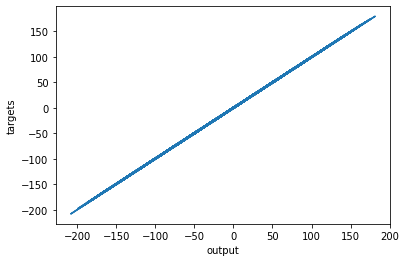

In [45]:
plt.plot(model.predict_on_batch(training_data['inputs']).round(1), training_data['targets'])
plt.xlabel('output')
plt.ylabel('targets')
plt.show()

In [46]:
##if the slope is close to 45 degrees , accuracy is higher